# Lounge Access Modelling

This project is focused around the problem of modelling demand for different types of airport lounge space. As British Airways (BA) plans for future operations at Heathrow terminal 3, it's important to forecast how many passengers will be eligible to access each lounge on any given day. Eligibility is determined from a combination of customer loyalty and travel class. 


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv('British Airways Summer Schedule Dataset - Forage Data Science Task 1.csv')

In [12]:
df.head()

,FLIGHT_DATE,FLIGHT_TIME,TIME_OF_DAY,AIRLINE_CD,FLIGHT_NO,DEPARTURE_STATION_CD,ARRIVAL_STATION_CD,ARRIVAL_COUNTRY,ARRIVAL_REGION,HAUL,AIRCRAFT_TYPE,FIRST_CLASS_SEATS,BUSINESS_CLASS_SEATS,ECONOMY_SEATS,TIER1_ELIGIBLE_PAX,TIER2_ELIGIBLE_PAX,TIER3_ELIGIBLE_PAX
0,02/09/2025,14:19,Afternoon,BA,BA5211,LHR,LAX,USA,North America,LONG,B777,8,49,178,0,10,38
1,10/06/2025,06:42,Morning,BA,BA7282,LHR,LAX,USA,North America,LONG,B777,8,49,178,0,7,28
2,27/10/2025,15:33,Afternoon,BA,BA1896,LHR,FRA,Germany,Europe,SHORT,A320,0,17,163,0,11,40
3,15/06/2025,18:29,Evening,BA,BA5497,LHR,IST,Turkey,Europe,SHORT,A320,0,8,172,0,16,54
4,25/08/2025,20:35,Evening,BA,BA1493,LHR,FRA,Germany,Europe,SHORT,A320,0,13,167,0,6,27


In [260]:
time_of_day = ['Morning', 'Afternoon', 'Evening']
haul = ['SHORT', 'LONG']
region = ['Europe', 'North America', 'Asia', 'Middle East']

for x in time_of_day:
	for y in haul:
		for z in region:
			df_filtered = df[(df['TIME_OF_DAY'] == x) & (df['HAUL'] == y) & (df['ARRIVAL_REGION'] == z)]
			if not df_filtered.empty:
				df_filtered_sum = np.array([df_filtered['TIER1_ELIGIBLE_PAX'].sum(), df_filtered['TIER2_ELIGIBLE_PAX'].sum(), df_filtered['TIER3_ELIGIBLE_PAX'].sum()])
				df_filtered_sum = df_filtered_sum / df_filtered_sum.sum()
				print(f"{x} {y} {z}: {df_filtered_sum * 100}")

Morning SHORT Europe: [ 1.58547276 20.32561052 78.08891672]
Morning LONG North America: [ 1.50345075 20.50696565 77.9895836 ]
Morning LONG Asia: [ 1.61774159 20.24855367 78.13370474]
Morning LONG Middle East: [ 1.41576696 20.51334284 78.0708902 ]
Afternoon SHORT Europe: [ 1.60824032 20.30594857 78.08581111]
Afternoon LONG North America: [ 1.49615851 20.4569349  78.04690659]
Afternoon LONG Asia: [ 1.21753247 20.77922078 78.00324675]
Afternoon LONG Middle East: [ 1.6236402  20.44163013 77.93472966]
Evening SHORT Europe: [ 1.50814887 20.44300084 78.04885029]
Evening LONG North America: [ 1.60576224 20.35287121 78.04136655]
Evening LONG Asia: [ 1.52245623 20.32479066 78.15275311]
Evening LONG Middle East: [ 1.73171706 20.28773145 77.98055149]


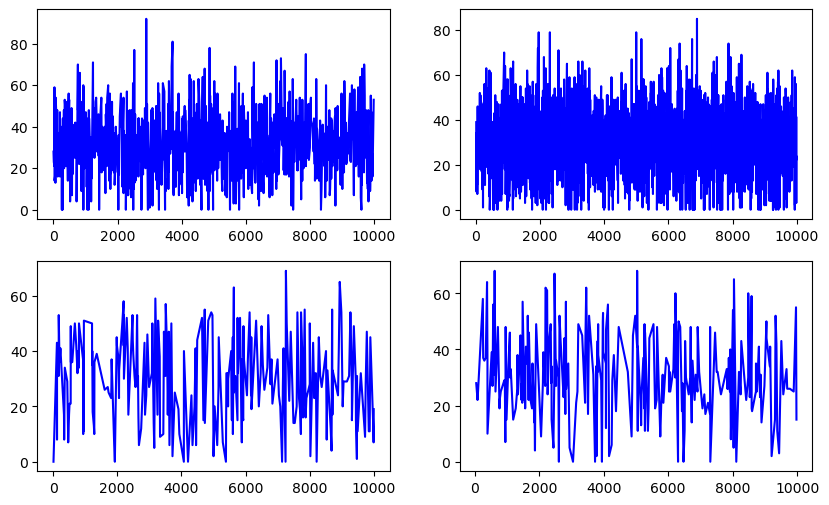

In [80]:
morning_NA_flights = morning_flights[morning_flights['ARRIVAL_REGION'] == 'North America']
morning_EU_flights = morning_flights[morning_flights['ARRIVAL_REGION'] == 'Europe']
morning_AS_flights = morning_flights[morning_flights['ARRIVAL_REGION'] == 'Asia']
morning_ME_flights = morning_flights[morning_flights['ARRIVAL_REGION'] == 'Middle East']

fig, ax = plt.subplots(2, 2, figsize=(10, 6))
ax[0, 0].plot(morning_NA_flights.index, morning_NA_flights['TIER3_ELIGIBLE_PAX'], label='TIER 1', color='blue')
ax[0, 1].plot(morning_EU_flights.index, morning_EU_flights['TIER3_ELIGIBLE_PAX'], label='TIER 1', color='blue')
ax[1, 0].plot(morning_AS_flights.index, morning_AS_flights['TIER3_ELIGIBLE_PAX'], label='TIER 1', color='blue')
ax[1, 1].plot(morning_ME_flights.index, morning_ME_flights['TIER3_ELIGIBLE_PAX'], label='TIER 1', color='blue')

15.284233144593246 15.438821896917569 15.413170585465139


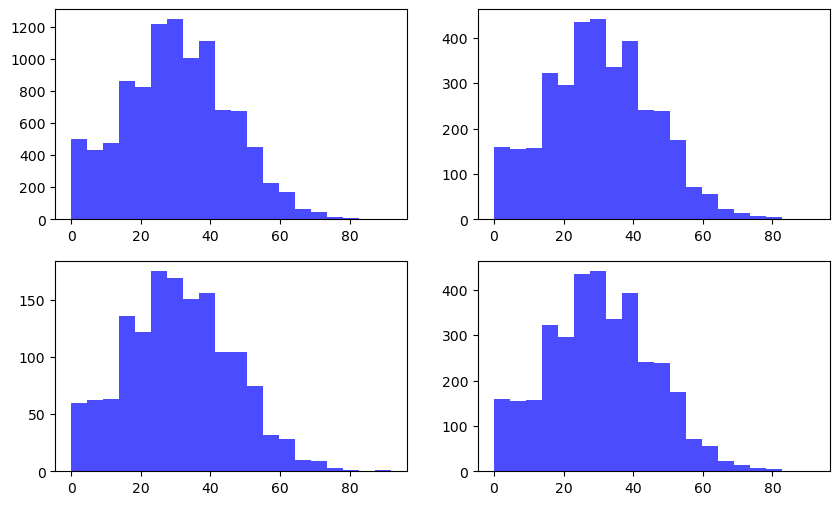

In [150]:
std1 = df['TIER3_ELIGIBLE_PAX'].describe()['std']
std2 = df[df['ARRIVAL_REGION'] == 'North America']['TIER3_ELIGIBLE_PAX'].describe()['std']
std3 = morning_flights[morning_flights['HAUL'] == 'LONG']['TIER3_ELIGIBLE_PAX'].describe()['std']


fig, ax = plt.subplots(2, 2, figsize=(10, 6))
ax[0, 0].hist(df['TIER3_ELIGIBLE_PAX'], bins=20, color='blue', alpha=0.7) 
ax[0, 1].hist(morning_flights['TIER3_ELIGIBLE_PAX'], bins=20, color='blue', alpha=0.7) 
ax[1, 0].hist(morning_flights[morning_flights['HAUL'] == 'LONG']['TIER3_ELIGIBLE_PAX'], bins=20, color='blue', alpha=0.7) 
ax[1, 1].hist(morning_flights['TIER3_ELIGIBLE_PAX'], bins=20, color='blue', alpha=0.7) 

print(std1, std2, std3)

In [206]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
X = df[['HAUL', 'ARRIVAL_REGION', 'TIME_OF_DAY']]
y = df['TIER3_ELIGIBLE_PAX']
label_encoder = LabelEncoder()
X = X.apply(label_encoder.fit_transform)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

c:\Users\isaac\miniconda3\envs\data-science\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,HAUL,ARRIVAL_REGION,TIME_OF_DAY
6252,0,3,3
4684,1,1,3
1731,0,0,3
4742,1,1,2
4521,1,1,1
...,...,...,...
6412,0,3,3
8285,0,0,3
7853,0,3,3
1095,0,0,1


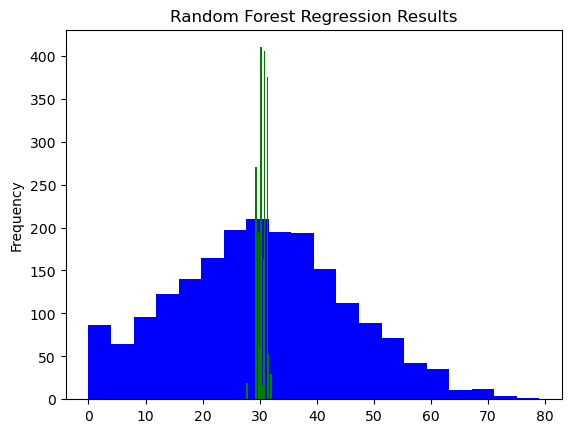

6252    71
4684    14
1731    25
4742    30
4521    47
        ..
6412     2
8285    45
7853    39
1095    29
6929    14
Name: TIER3_ELIGIBLE_PAX, Length: 2000, dtype: int64

In [253]:
plt.hist(y_test.values, bins=20, color='blue', label="Actual Data")
plt.hist(y_pred, bins=20, color='green', label="Random Forest Prediction") 
plt.title("Random Forest Regression Results")
plt.ylabel('Frequency')
plt.show()
y_test